# Projeto Final

Carolina Abdu e Mariana Meirelles

## Import de Bibliotecas

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import gamma, beta, t
from sklearn.model_selection import train_test_split

## Pré-processamento dos Dados

In [6]:
df = pd.read_csv("./ndt_tests_corrigido.csv")
display(df)


,timestamp,download_throughput_bps,rtt_download_sec,upload_throughput_bps,rtt_upload_sec,packet_loss_percent,client,server
0,2025-08-09 15:28:02.000 +0000,8.223657e+07,0.231862,6.973217e+07,0.247727,0.000000,client12,server06
1,2025-08-09 15:30:11.000 +0000,9.027315e+08,0.012000,8.521780e+08,0.005423,0.008226,client01,server07
2,2025-08-10 04:27:43.000 +0000,5.910655e+08,0.014000,2.812188e+08,0.014544,5.954284,client13,server07
3,2025-08-09 22:45:07.000 +0000,6.721139e+08,0.011000,1.135400e+08,0.010482,0.261528,client12,server07
4,2025-08-10 04:49:21.000 +0000,8.122087e+08,0.009000,6.857905e+08,0.009368,1.381646,client03,server03
...,...,...,...,...,...,...,...,...
7082,2025-08-07 16:05:20.000 +0000,-1.000000e+00,-0.001000,6.486659e+08,0.006574,-1.000000,client04,server07
7083,2025-08-18 10:07:18.000 +0000,-1.000000e+00,-0.001000,6.790900e+08,0.005833,-1.000000,client04,server07
7084,2025-08-20 08:59:39.000 +0000,-1.000000e+00,-0.001000,8.799421e+08,0.013070,-1.000000,client04,server02
7085,2025-08-25 04:39:11.000 +0000,-1.000000e+00,-0.001000,6.481266e+08,0.009771,-1.000000,client03,server02


1. Remoção de valores ausentes

In [7]:
df = df.dropna()

2. Eliminação de valores negativos

In [8]:
df = df[(df.select_dtypes(include='number') >= 0).all(axis=1)].copy()
display(df)


,timestamp,download_throughput_bps,rtt_download_sec,upload_throughput_bps,rtt_upload_sec,packet_loss_percent,client,server
0,2025-08-09 15:28:02.000 +0000,8.223657e+07,0.231862,6.973217e+07,0.247727,0.000000,client12,server06
1,2025-08-09 15:30:11.000 +0000,9.027315e+08,0.012000,8.521780e+08,0.005423,0.008226,client01,server07
2,2025-08-10 04:27:43.000 +0000,5.910655e+08,0.014000,2.812188e+08,0.014544,5.954284,client13,server07
3,2025-08-09 22:45:07.000 +0000,6.721139e+08,0.011000,1.135400e+08,0.010482,0.261528,client12,server07
4,2025-08-10 04:49:21.000 +0000,8.122087e+08,0.009000,6.857905e+08,0.009368,1.381646,client03,server03
...,...,...,...,...,...,...,...,...
7077,2025-08-30 23:24:52.000 +0000,8.250996e+08,0.004822,8.540814e+08,0.004414,0.000000,client01,server07
7078,2025-08-30 23:35:01.000 +0000,9.067732e+08,0.003719,7.891003e+08,0.003797,0.902384,client06,server07
7079,2025-08-30 23:44:20.000 +0000,1.067567e+08,0.117000,3.867771e+08,0.007549,0.384653,client07,server07
7080,2025-08-30 23:44:28.000 +0000,9.034447e+08,0.004296,6.387240e+08,0.004337,0.041953,client03,server07


3. Conversão de unidades e padronização

In [9]:
df['packet_loss_fraction'] = df['packet_loss_percent'] / 100

## Análise Exploratória de Dados (EDA)

### Cálculo de Métricas Básicas
A seguir estão apresentados DataFrames com as seguintes métricas por cliente e servidor:
- Média
- Mediana
- Variância
- Desvio padrão
- Quantis

1. Média por cliente e servidor

In [10]:
# Média por cliente e servidor
df_media = df.groupby(['client', 'server'])[[
    'download_throughput_bps',
    'rtt_download_sec',
    'upload_throughput_bps',
    'rtt_upload_sec',
    'packet_loss_fraction'
]].mean()


display(df_media)

download_throughput_bps  rtt_download_sec  \
client   server                                                
client01 server01             8.829749e+08          0.011307   
         server02             8.908720e+08          0.010768   
         server03             8.544174e+08          0.011380   
         server04             1.612584e+08          0.121669   
         server05             1.645217e+08          0.118796   
...                                    ...               ...   
client13 server03             5.969713e+08          0.009667   
         server04             5.960891e+08          0.010636   
         server05             5.962774e+08          0.010263   
         server06             5.964782e+08          0.010525   
         server07             5.915667e+08          0.013428   

                   upload_throughput_bps  rtt_upload_sec  packet_loss_fraction  
client   server                                                                 
client01 server01           8.786129e+08        0.011689              0.008757  
         server02           8.897476e+08        0.011227              0.007966  
         server03           8.820701e+08        0.011839              0.014568  
         server04           1.830890e+08        0.121401              0.006572  
         server05           1.853715e+08        0.118655              0.003970  
...                                  ...             ...                   ...  
client13 server03           2.995922e+08        0.009496              0.059945  
         server04           2.943521e+08        0.012104              0.056936  
         server05           2.992890e+08        0.010702              0.056134  
         server06           2.982673e+08        0.010869              0.058196  
         server07           2.919694e+08        0.015407              0.048486  

[91 rows x 5 columns]

2. Mediana por cliente e servidor

In [11]:
# Mediana por cliente e servidor
df_mediana = df.groupby(['client', 'server'])[[
    'download_throughput_bps',
    'rtt_download_sec',
    'upload_throughput_bps',
    'rtt_upload_sec',
    'packet_loss_fraction'
]].median()

display(df_mediana)

download_throughput_bps  rtt_download_sec  \
client   server                                                
client01 server01             9.073100e+08          0.011000   
         server02             9.074510e+08          0.010959   
         server03             9.033696e+08          0.011000   
         server04             1.741704e+08          0.120000   
         server05             1.738510e+08          0.119975   
...                                    ...               ...   
client13 server03             5.975985e+08          0.008000   
         server04             5.972602e+08          0.011000   
         server05             5.972018e+08          0.010000   
         server06             5.968685e+08          0.010000   
         server07             5.942005e+08          0.014000   

                   upload_throughput_bps  rtt_upload_sec  packet_loss_fraction  
client   server                                                                 
client01 server01           9.032851e+08        0.011525              0.005917  
         server02           9.006677e+08        0.010951              0.005880  
         server03           9.011952e+08        0.011508              0.005828  
         server04           1.846763e+08        0.119826              0.000000  
         server05           1.860897e+08        0.118567              0.000000  
...                                  ...             ...                   ...  
client13 server03           2.998699e+08        0.008674              0.061219  
         server04           2.989333e+08        0.010142              0.059257  
         server05           3.002223e+08        0.010065              0.060466  
         server06           2.989474e+08        0.010274              0.060986  
         server07           2.983866e+08        0.014956              0.047648  

[91 rows x 5 columns]

3. Variância por cliente e servidor

In [12]:
# Variância por cliente e servidor
df_var= df.groupby(['client', 'server'])[[
    'download_throughput_bps',
    'rtt_download_sec',
    'upload_throughput_bps',
    'rtt_upload_sec',
    'packet_loss_fraction'
]].var()

display(df_var)

download_throughput_bps  rtt_download_sec  \
client   server                                                
client01 server01             6.987517e+15          0.000001   
         server02             5.545873e+15          0.000001   
         server03             2.141022e+16          0.000001   
         server04             1.352163e+15          0.000280   
         server05             1.011865e+15          0.000006   
...                                    ...               ...   
client13 server03             9.194497e+12          0.000005   
         server04             1.516958e+13          0.000003   
         server05             9.457503e+12          0.000002   
         server06             5.204998e+12          0.000002   
         server07             9.302277e+14          0.000054   

                   upload_throughput_bps  rtt_upload_sec  packet_loss_fraction  
client   server                                                                 
client01 server01           1.243934e+16        0.000002              0.000167  
         server02           1.269357e+15        0.000001              0.000153  
         server03           6.654286e+15        0.000002              0.000974  
         server04           2.405106e+14        0.000273              0.000677  
         server05           1.762714e+13        0.000006              0.000127  
...                                  ...             ...                   ...  
client13 server03           3.139403e+12        0.000003              0.000069  
         server04           1.002487e+15        0.000108              0.000099  
         server05           9.861835e+12        0.000002              0.000117  
         server06           1.435733e+13        0.000002              0.000080  
         server07           3.076915e+14        0.000015              0.000150  

[91 rows x 5 columns]

4. Desvio padrão por cliente e servidor

In [13]:
# Desvio padrão por cliente e servidor
df_desvio= df.groupby(['client', 'server'])[[
    'download_throughput_bps',
    'rtt_download_sec',
    'upload_throughput_bps',
    'rtt_upload_sec',
    'packet_loss_fraction'
]].std()

display(df_desvio)

download_throughput_bps  rtt_download_sec  \
client   server                                                
client01 server01             8.359137e+07          0.001204   
         server02             7.447062e+07          0.001120   
         server03             1.463223e+08          0.001177   
         server04             3.677177e+07          0.016741   
         server05             3.180982e+07          0.002509   
...                                    ...               ...   
client13 server03             3.032243e+06          0.002246   
         server04             3.894815e+06          0.001685   
         server05             3.075305e+06          0.001355   
         server06             2.281447e+06          0.001358   
         server07             3.049963e+07          0.007382   

                   upload_throughput_bps  rtt_upload_sec  packet_loss_fraction  
client   server                                                                 
client01 server01           1.115318e+08        0.001235              0.012933  
         server02           3.562804e+07        0.001112              0.012370  
         server03           8.157381e+07        0.001291              0.031217  
         server04           1.550841e+07        0.016532              0.026014  
         server05           4.198468e+06        0.002406              0.011266  
...                                  ...             ...                   ...  
client13 server03           1.771836e+06        0.001729              0.008302  
         server04           3.166208e+07        0.010379              0.009972  
         server05           3.140356e+06        0.001465              0.010805  
         server06           3.789106e+06        0.001472              0.008948  
         server07           1.754114e+07        0.003918              0.012263  

[91 rows x 5 columns]

5. Quantis

In [14]:
# Percentis : 50, 90 e 99 %

# Agrupando por cliente e servidor
df_quantis = df.groupby(['client', 'server']).agg({
    'download_throughput_bps': ['quantile', lambda x: x.quantile(0.9), lambda x: x.quantile(0.99)],
    'upload_throughput_bps': ['quantile', lambda x: x.quantile(0.9), lambda x: x.quantile(0.99)],
    'rtt_download_sec': ['quantile', lambda x: x.quantile(0.9), lambda x: x.quantile(0.99)],
    'rtt_upload_sec': ['quantile', lambda x: x.quantile(0.9), lambda x: x.quantile(0.99)],
    'packet_loss_fraction': ['quantile', lambda x: x.quantile(0.9), lambda x: x.quantile(0.99)]
})

display(df_quantis)

download_throughput_bps                              \
                                 quantile    <lambda_0>    <lambda_1>   
client   server                                                         
client01 server01            9.073100e+08  9.159104e+08  9.186383e+08   
         server02            9.074510e+08  9.164918e+08  9.185873e+08   
         server03            9.033696e+08  9.109964e+08  9.202228e+08   
         server04            1.741704e+08  1.807718e+08  1.816475e+08   
         server05            1.738510e+08  1.810952e+08  1.816281e+08   
...                                   ...           ...           ...   
client13 server03            5.975985e+08  5.986767e+08  6.011420e+08   
         server04            5.972602e+08  5.985768e+08  5.997637e+08   
         server05            5.972018e+08  5.984512e+08  5.999179e+08   
         server06            5.968685e+08  5.981595e+08  6.007008e+08   
         server07            5.942005e+08  5.979179e+08  6.002475e+08   

                  upload_throughput_bps                              \
                               quantile    <lambda_0>    <lambda_1>   
client   server                                                       
client01 server01          9.032851e+08  9.086379e+08  9.123308e+08   
         server02          9.006677e+08  9.066025e+08  9.112362e+08   
         server03          9.011952e+08  9.109121e+08  9.146862e+08   
         server04          1.846763e+08  1.904308e+08  1.916000e+08   
         server05          1.860897e+08  1.896315e+08  1.903495e+08   
...                                 ...           ...           ...   
client13 server03          2.998699e+08  3.016509e+08  3.023825e+08   
         server04          2.989333e+08  3.016318e+08  3.024628e+08   
         server05          3.002223e+08  3.023235e+08  3.027463e+08   
         server06          2.989474e+08  3.017479e+08  3.026601e+08   
         server07          2.983866e+08  3.012591e+08  3.018689e+08   

                  rtt_download_sec                       rtt_upload_sec  \
                          quantile <lambda_0> <lambda_1>       quantile   
client   server                                                           
client01 server01         0.011000   0.012400   0.015000       0.011525   
         server02         0.010959   0.011000   0.014900       0.010951   
         server03         0.011000   0.012524   0.014858       0.011508   
         server04         0.120000   0.123116   0.185359       0.119826   
         server05         0.119975   0.121872   0.122171       0.118567   
...                            ...        ...        ...            ...   
client13 server03         0.008000   0.012000   0.014680       0.008674   
         server04         0.011000   0.012000   0.016840       0.010142   
         server05         0.010000   0.012000   0.012450       0.010065   
         server06         0.010000   0.012000   0.013000       0.010274   
         server07         0.014000   0.015000   0.022952       0.014956   

                                        packet_loss_fraction             \
                  <lambda_0> <lambda_1>             quantile <lambda_0>   
client   server                                                           
client01 server01   0.012702   0.015895             0.005917   0.007949   
         server02   0.011912   0.015390             0.005880   0.008625   
         server03   0.013435   0.015490             0.005828   0.022999   
         server04   0.121631   0.184371             0.000000   0.007715   
         server05   0.121446   0.122188             0.000000   0.009755   
...                      ...        ...                  ...        ...   
client13 server03   0.012182   0.013135             0.061219   0.068048   
         server04   0.012410   0.047901             0.059257   0.068957   
         server05   0.012539   0.014323             0.060466   0.067552   
         server06   0.012429   0.014868          

### Escolha de 2 clientes para análise

In [15]:
# Escolha dos clienets que serão comparados, usando as médias das suas variáveis como base
df.groupby('client')[[
    'download_throughput_bps',
    'upload_throughput_bps',
    'rtt_download_sec',
    'rtt_upload_sec',
    'packet_loss_fraction'
]].mean().reset_index()

,client,download_throughput_bps,upload_throughput_bps,rtt_download_sec,rtt_upload_sec,packet_loss_fraction
0,client01,6.503291e+08,7.140497e+08,0.044897,0.031305,0.005241
1,client02,6.393095e+08,5.619516e+08,0.039058,0.029352,0.007814
2,client03,6.144290e+08,5.209717e+08,0.044533,0.033029,0.006781
3,client04,5.837552e+08,5.489605e+08,0.051279,0.037629,0.005230
4,client05,3.095310e+08,3.477522e+08,0.045166,0.029707,0.063119
5,client06,6.122632e+08,6.076727e+08,0.046634,0.033717,0.008337
6,client07,6.309103e+08,4.919034e+08,0.046375,0.034484,0.005325
7,client08,2.338896e+08,2.258985e+08,0.054419,0.040777,0.050610
8,client09,6.452400e+08,4.526501e+08,0.044974,0.033937,0.004833
9,client10,2.317913e+08,3.734781e+07,0.087202,0.067731,0.014803


Clientes escolhidos para análise: 'client12' e 'client05

### Plotagem de Gráficos

1. Histograma

Text(0.5, 1.0, 'Histograma do Download Throughput - Client 12')

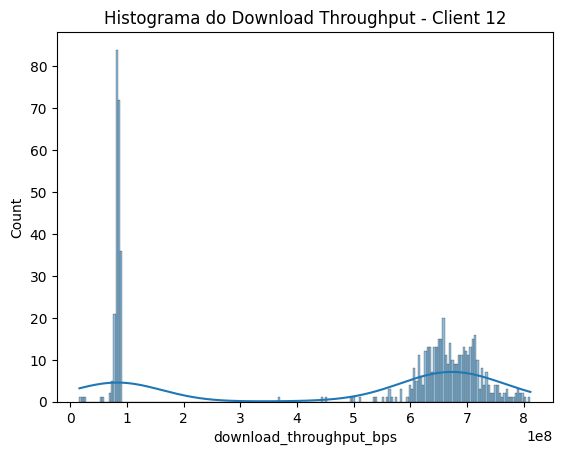

In [16]:
# Histograma
sns.histplot(df[df['client']=='client12']['download_throughput_bps'], bins=200, kde=True)
plt.title(f'Histograma do Download Throughput - Client 12')


Text(0.5, 1.0, 'Histograma do Upload Throughput - Client 12')

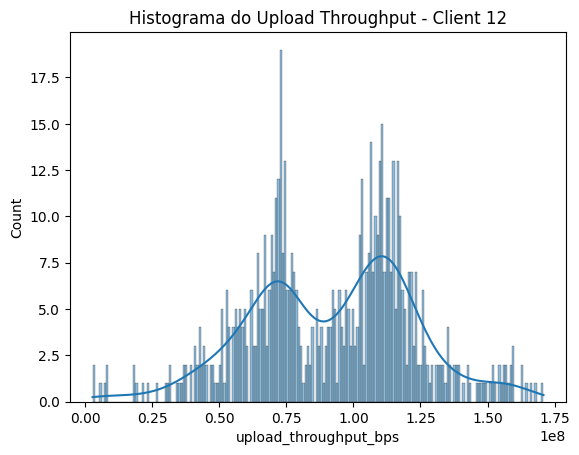

In [17]:
sns.histplot(df[df['client']=='client12']['upload_throughput_bps'], bins=200, kde=True)
plt.title(f'Histograma do Upload Throughput - Client 12')


Text(0.5, 1.0, 'Histograma do RTT Download - Client 12')

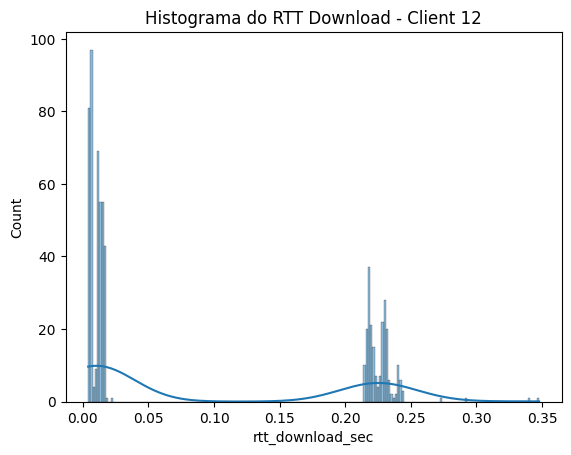

In [18]:
sns.histplot(df[df['client']=='client12']['rtt_download_sec'], bins=200, kde=True)
plt.title(f'Histograma do RTT Download - Client 12')

Text(0.5, 1.0, 'Histograma do RTT Upload - Client 12')

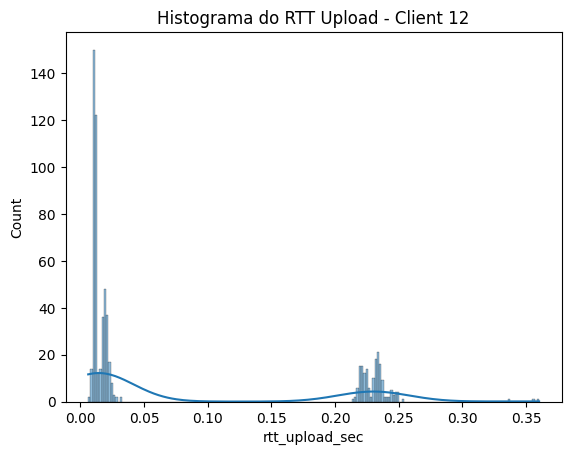

In [19]:
sns.histplot(df[df['client']=='client12']['rtt_upload_sec'], bins=200, kde=True)
plt.title(f'Histograma do RTT Upload - Client 12')

Text(0.5, 1.0, 'Histograma do Packet Loss Fraction - Client 12')

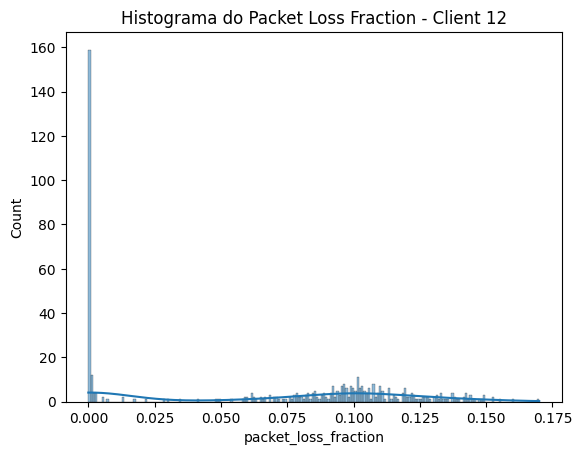

In [ ]:
sns.histplot(df[df['client']=='client12']['packet_loss_fraction'], bins=200, kde=True)
plt.title(f'Histograma do Packet Loss Fraction - Client 12')

Text(0.5, 1.0, 'Histograma do Download Throughput - Client 05')

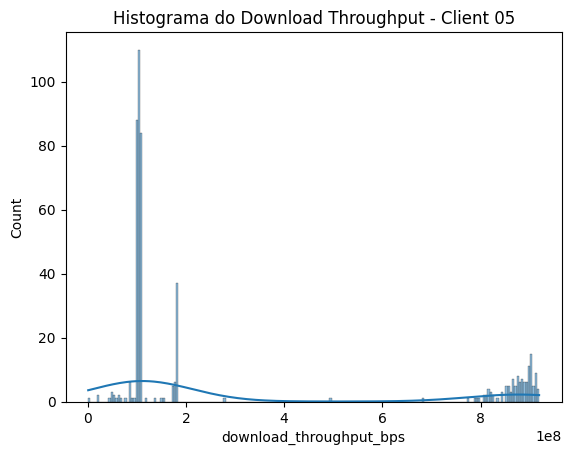

In [21]:
sns.histplot(df[df['client']=='client05']['download_throughput_bps'], bins=200, kde=True)
plt.title(f'Histograma do Download Throughput - Client 05')

Text(0.5, 1.0, 'Histograma do Upload Throughput - Client 05')

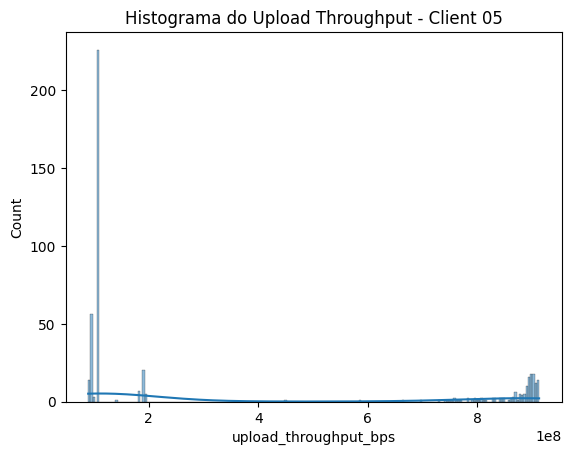

In [22]:
sns.histplot(df[df['client']=='client05']['upload_throughput_bps'], bins=200, kde=True)
plt.title(f'Histograma do Upload Throughput - Client 05')

Text(0.5, 1.0, 'Histograma do RTT Download - Client 05')

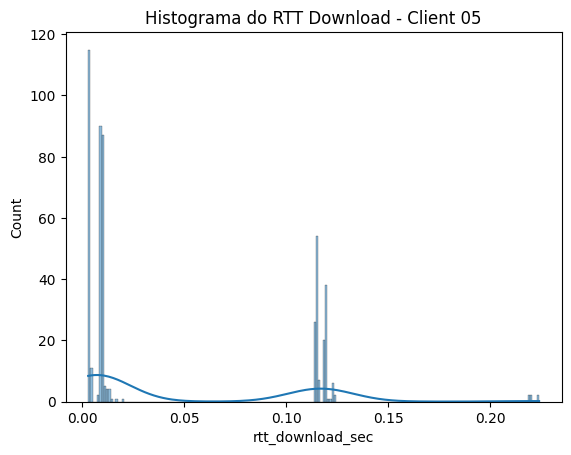

In [23]:
sns.histplot(df[df['client']=='client05']['rtt_download_sec'], bins=200, kde=True)
plt.title(f'Histograma do RTT Download - Client 05')

Text(0.5, 1.0, 'Histograma do RTT Upload - Client 05')

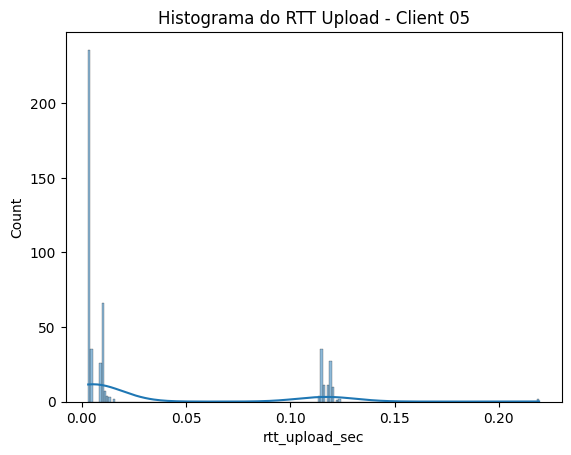

In [24]:
sns.histplot(df[df['client']=='client05']['rtt_upload_sec'], bins=200, kde=True)
plt.title(f'Histograma do RTT Upload - Client 05')

Text(0.5, 1.0, 'Histograma do Packet Loss Fraction - Client 05')

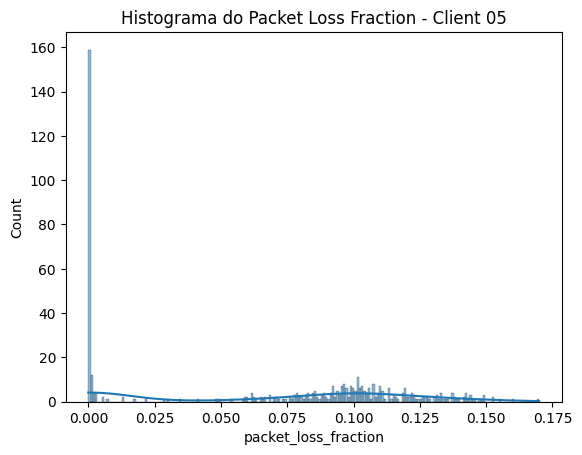

In [25]:
sns.histplot(df[df['client']=='client05']['packet_loss_fraction'], bins=200, kde=True)
plt.title(f'Histograma do Packet Loss Fraction - Client 05')

2. Boxplot

<Axes: xlabel='client', ylabel='download_throughput_bps'>

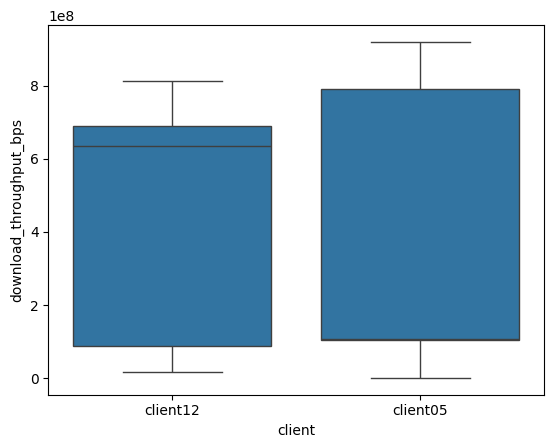

In [26]:
# Boxplot comparativo
sns.boxplot(x='client', y='download_throughput_bps', data=df[df['client'].isin(['client12', 'client05'])])

<Axes: xlabel='client', ylabel='upload_throughput_bps'>

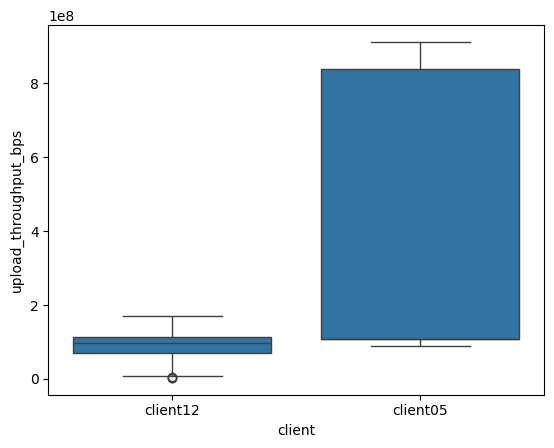

In [27]:
# Boxplot comparativo
sns.boxplot(x='client', y='upload_throughput_bps', data=df[df['client'].isin(['client12', 'client05'])])

<Axes: xlabel='client', ylabel='rtt_download_sec'>

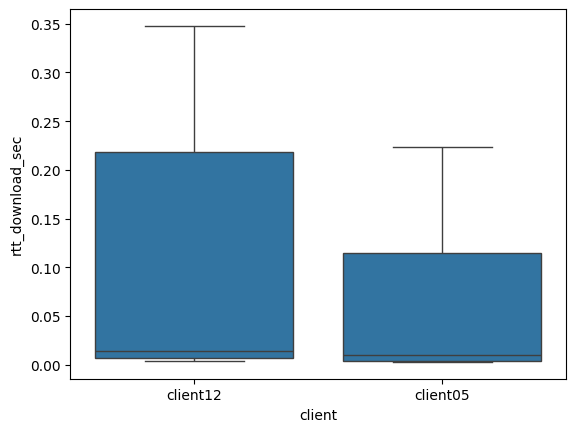

In [28]:
# Boxplot comparativo
sns.boxplot(x='client', y='rtt_download_sec', data=df[df['client'].isin(['client12', 'client05'])])

<Axes: xlabel='client', ylabel='rtt_upload_sec'>

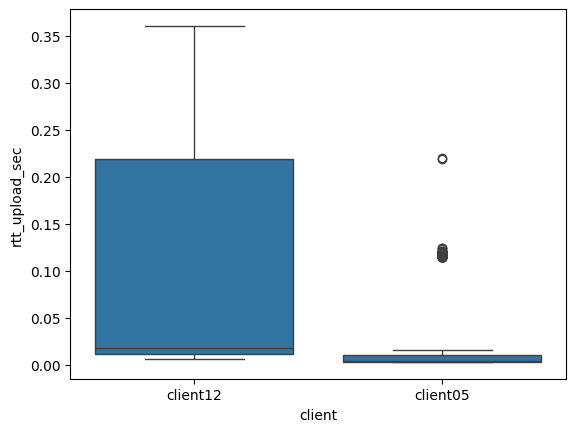

In [29]:
# Boxplot comparativo
sns.boxplot(x='client', y='rtt_upload_sec', data=df[df['client'].isin(['client12', 'client05'])])

<Axes: xlabel='client', ylabel='packet_loss_fraction'>

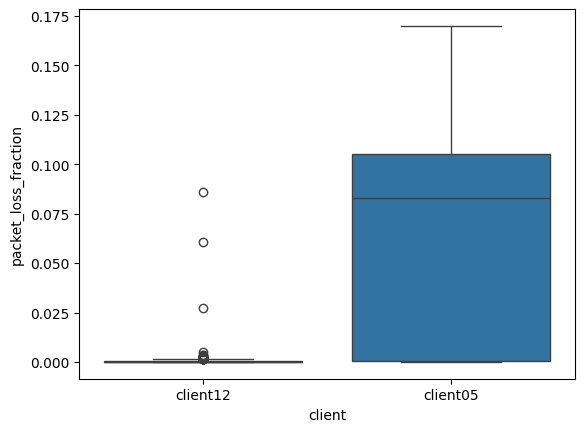

In [30]:
# Boxplot comparativo
sns.boxplot(x='client', y='packet_loss_fraction', data=df[df['client'].isin(['client12', 'client05'])])

3. Scatter Plot

<Axes: xlabel='packet_loss_fraction', ylabel='upload_throughput_bps'>

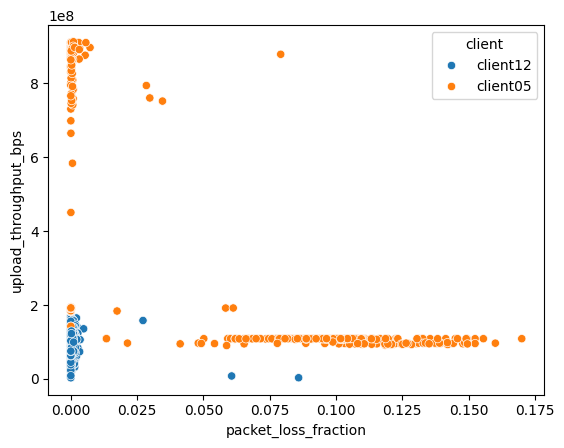

In [31]:
# Scatter plot
sns.scatterplot(x='packet_loss_fraction', y='upload_throughput_bps', hue='client', data=df[df['client'].isin(['client12', 'client05'])])

### Modelo Paramétrico Candidato

- Throughput (Download e Upload): Gama - simplificação que ignora seu comportamento bimodal (especialmente para o upload do cliente 12)
- RTT (Download e Upload): Gama - Cauda longa a direita \\
- Packet Loss: Beta - Muito próximo de zero com alguns picos

## Máxima Verossimilhança (MLE)

Selecionando o Client 05 para analisarmos

In [64]:
df_client = df[df['client'] == 'client12'].copy()

### Estimador de Máxima Verossimilhança θˆMLE

Gama: Throughput e RTT

In [65]:
# Throughput Download

data_throughput_d = df_client['download_throughput_bps'].values
k_throughput_d, loc_throughput_d, beta_throughput_d = gamma.fit(data_throughput_d, floc=0)
lambda_throughput_d = 1/beta_throughput_d # Parâmetro de Taxa (Rate) se usarmos a parametrização 1/beta

media_amostral_throughput_d = df_client['download_throughput_bps'].mean()

print(f"\nMLE - Gama -Throughput Download (Client 05):")
print(f"Forma (k) = {k_throughput_d:.3f}")
print(f"Escala (beta) = {beta_throughput_d:.2e} (bps)")
print(f"Média Estimada: {k_throughput_d / lambda_throughput_d:.2e} bps // Média amostral: {media_amostral_throughput_d}")


MLE - Gama -Throughput Download (Client 05):
Forma (k) = 1.485
Escala (beta) = 3.13e+08 (bps)
Média Estimada: 4.65e+08 bps // Média amostral: 464765894.8059782


In [66]:
# Throughput Upload

data_throughput_u = df_client['upload_throughput_bps'].values
k_throughput_u, loc_throughput_u, beta_throughput_u = gamma.fit(data_throughput_u, floc=0)
lambda_throughput_u = 1/beta_throughput_u # Parâmetro de Taxa (Rate) se usarmos a parametrização 1/beta

media_amostral_throughput_u = df_client['upload_throughput_bps'].mean()

print(f"\nMLE - Gama -Throughput Upload (Client 05):")
print(f"Forma (k) = {k_throughput_u:.3f}")
print(f"Escala (beta) = {beta_throughput_u:.2e} (bps)")
print(f"Média Estimada: {k_throughput_u / lambda_throughput_u:.2e} bps // Média amostral: {media_amostral_throughput_u}")


MLE - Gama -Throughput Upload (Client 05):
Forma (k) = 6.758
Escala (beta) = 1.36e+07 (bps)
Média Estimada: 9.22e+07 bps // Média amostral: 92171175.64682905


In [67]:
# RTT Download

data_rtt_d = df_client['rtt_download_sec'].values
k_rtt_d, loc_rtt_d, beta_rtt_d = gamma.fit(data_rtt_d, floc=0)
lambda_rtt_d = 1/beta_rtt_d # Parâmetro de Taxa (Rate) se usarmos a parametrização 1/beta

media_amostral_rtt_d = df_client['rtt_download_sec'].mean()

print(f"\nMLE - Gama - RTT Download (Client 05):")
print(f"Forma (k) = {k_rtt_d:.3f}")
print(f"Escala (beta) = {beta_rtt_d:.3f} (segundos)")
print(f"Média Estimada: {k_rtt_d / lambda_rtt_d:.2e} bps // Média amostral: {media_amostral_rtt_d}")


MLE - Gama - RTT Download (Client 05):
Forma (k) = 0.567
Escala (beta) = 0.153 (segundos)
Média Estimada: 8.65e-02 bps // Média amostral: 0.08648528281249998


In [68]:
# RTT Upload

data_rtt_u = df_client['rtt_upload_sec'].values
k_rtt_u, loc_rtt_u, beta_rtt_u = gamma.fit(data_rtt_u, floc=0)
lambda_rtt_u = 1/beta_rtt_u # Parâmetro de Taxa (Rate) se usarmos a parametrização 1/beta

media_amostral_rtt_u = df_client['rtt_upload_sec'].mean()

print(f"\nMLE - Gama - RTT Upload (Client 05):")
print(f"Forma (k) = {k_rtt_u:.3f}")
print(f"Escala (beta) = {beta_rtt_u:.3f} (segundos)")
print(f"Média Estimada: {k_rtt_u / lambda_rtt_u:.2e} bps // Média amostral: {media_amostral_rtt_u}")


MLE - Gama - RTT Upload (Client 05):
Forma (k) = 0.674
Escala (beta) = 0.109 (segundos)
Média Estimada: 7.35e-02 bps // Média amostral: 0.07346213906249999


Beta: Packet Loss

In [69]:
# Packet Loss

epsilon = 1e-10
data_loss = df_client['packet_loss_fraction'].apply(lambda x: max(epsilon, min(1-epsilon, x))).values

k_loss, beta_loss, loc_loss, scale_loss = beta.fit(data_loss, floc=0, fscale=1)

media_amostral_loss = df_client['packet_loss_fraction'].mean()

print(f"\n MLE - Beta - Packet Loss (Client 05):")
print(f"Forma (k) = {k_loss:.3f}")
print(f"Escala (beta) = {beta_loss:.3f}")
print(f"Média Estimada: {k_loss / (k_loss + beta_loss):.4f} // Média amostral {media_amostral_loss:.4f}")


 MLE - Beta - Packet Loss (Client 05):
Forma (k) = 0.127
Escala (beta) = 195.711
Média Estimada: 0.0006 // Média amostral 0.0006


### Avaliação do Ajuste (Gráficos Comparativos)

1. Histograma dos dados reais em conjunto com a função densidade/massa de probabilidade do modelo ajustado usando o θˆMLE.
2. QQ plot dos dados reais versus quantis teóricos do modelo ajustado.

In [70]:
# Definindo uma função para plotagem

def avaliacao_ajuste(data, distribuicao, mle_params, title):
    """Gera o Histograma e PDF e o QQ-Plot para o modelo ajustado."""
    
    # Histograma e PDF
    plt.figure(figsize=(15, 6))
    x_range = np.linspace(data.min(), data.max(), 1000)
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=50, density=True, alpha=0.7, color='navy', label='Dados Reais')
    
    # Plota a PDF do modelo ajustado
    if distribuicao == beta:
        pdf = distribuicao.pdf(x_range, mle_params[0], mle_params[1], loc=mle_params[2], scale=mle_params[3])
        plt.plot(x_range, pdf, 'r-', lw=2, label=f'{distribuicao.name.capitalize()} Ajustada (MLE)')
    else: # Gama
        pdf = distribuicao.pdf(x_range, mle_params[0], loc=mle_params[1], scale=mle_params[2])
        plt.plot(x_range, pdf, 'r-', lw=2, label=f'{distribuicao.name.capitalize()} Ajustada (MLE)')

    plt.title(f'Histograma e PDF Ajustada: {title}')
    plt.xlabel(title.split(' ')[0])
    plt.ylabel('Densidade')
    plt.legend()
    
    #QQ-Plot
    if distribuicao == beta:
        sm.qqplot(data, dist=distribuicao, line='45', fit=False, 
                  distargs=(mle_params[0], mle_params[1]), loc=mle_params[2], scale=mle_params[3])
    else: # Gama
        sm.qqplot(data, dist=distribuicao, line='45', fit=False, 
                  distargs=(mle_params[0],), loc=mle_params[1], scale=mle_params[2])
                  
    plt.title(f'QQ-Plot: Dados vs. {distribuicao.name.capitalize()} Ajustada')
    plt.show()

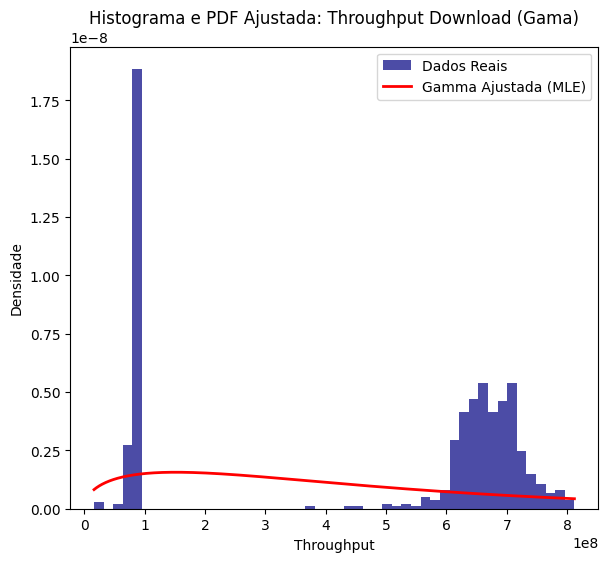

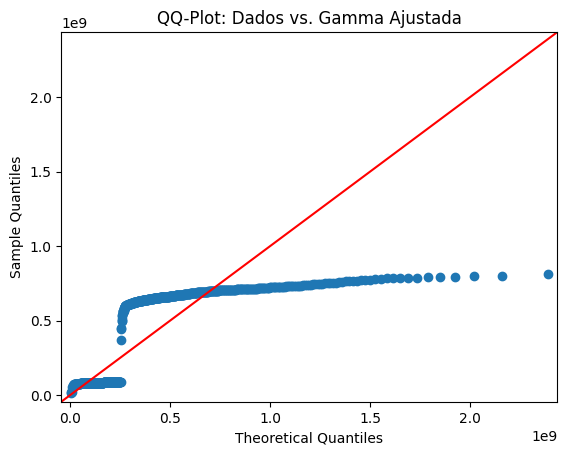

In [71]:
# Throughput Download
param_throughput_d = [k_throughput_d, loc_throughput_d, beta_throughput_d]
avaliacao_ajuste(data_throughput_d, gamma, param_throughput_d, 'Throughput Download (Gama)')

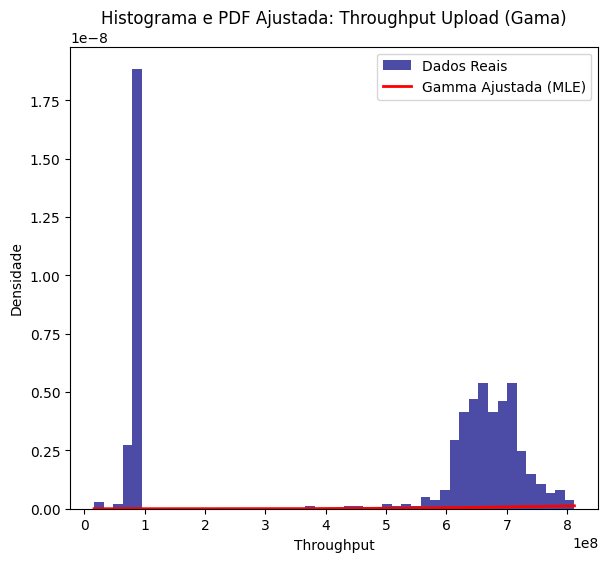

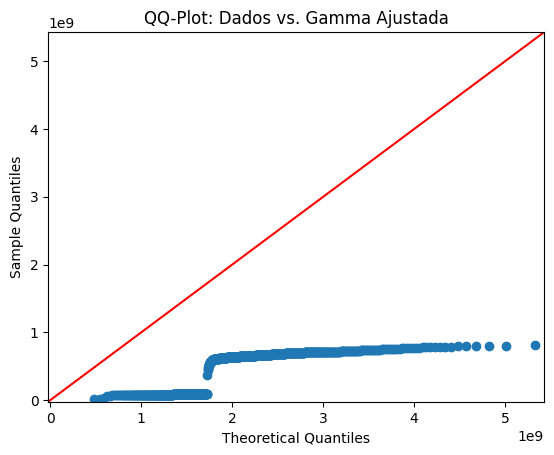

In [72]:
# Throughput Upload
param_throughput_u = [k_throughput_u, loc_throughput_d, beta_throughput_d]
avaliacao_ajuste(data_throughput_d, gamma, param_throughput_u, 'Throughput Upload (Gama)')

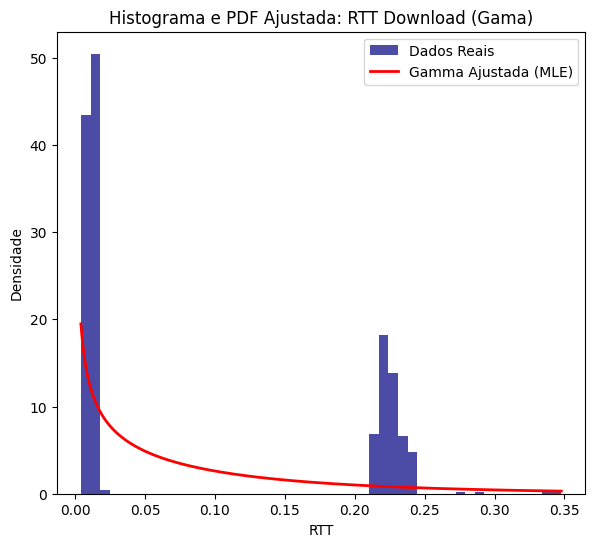

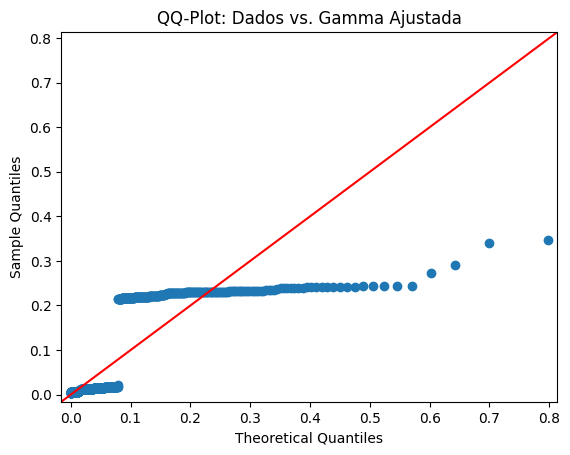

In [73]:
# RTT Download
param_rtt_d = [k_rtt_d, loc_rtt_d, beta_rtt_d]
avaliacao_ajuste(data_rtt_d, gamma, param_rtt_d, 'RTT Download (Gama)')

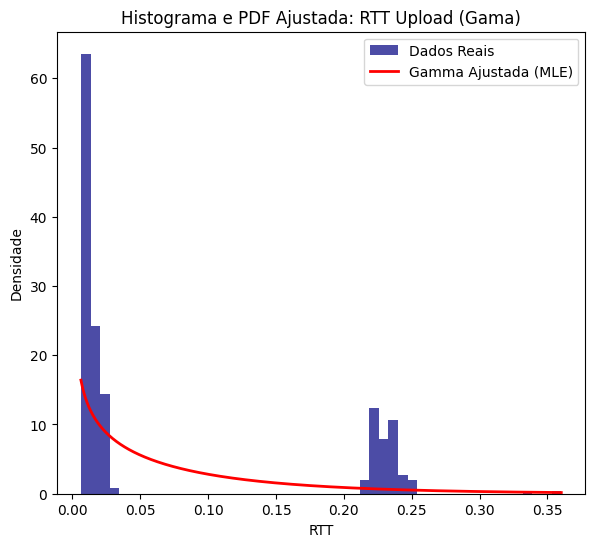

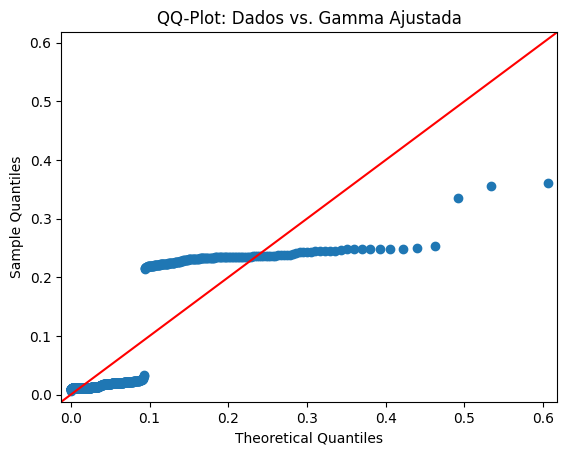

In [74]:
# RTT Upload
param_rtt_u = [k_rtt_u, loc_rtt_u, beta_rtt_u]
avaliacao_ajuste(data_rtt_u, gamma, param_rtt_u, 'RTT Upload (Gama)')

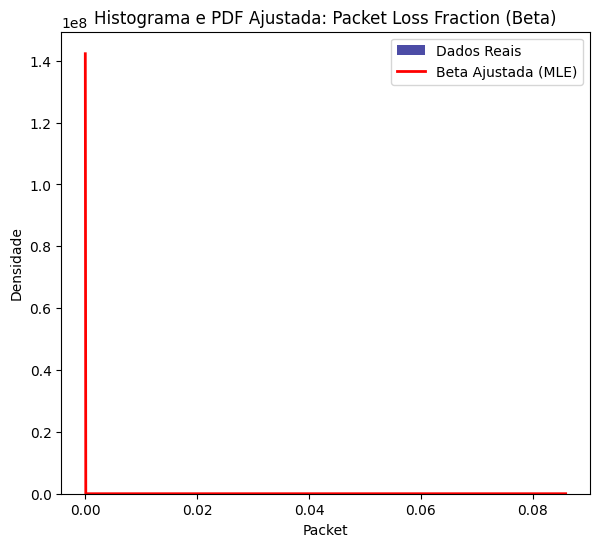

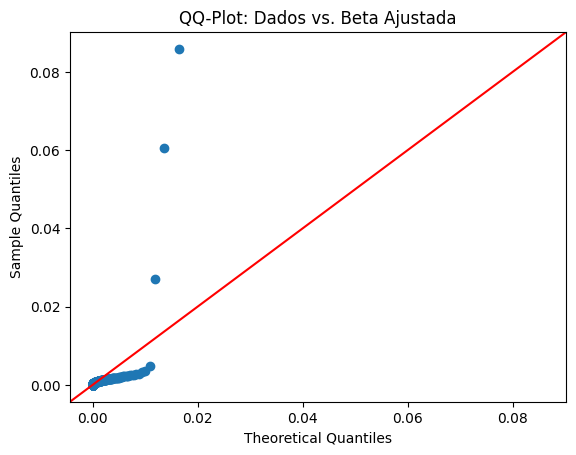

In [75]:
# Packet Loss
params_loss = [k_loss, beta_loss, loc_loss, scale_loss]
avaliacao_ajuste(data_loss, beta, params_loss, 'Packet Loss Fraction (Beta)')

## Inferência Bayesiana

In [76]:
# Definindo uma semente para garantir a reprodutibilidade
seed = 42

In [77]:
# Throughput Download (Gama)
data_throughput_d_train, data_throughput_d_test = train_test_split(data_throughput_d, test_size=0.3, random_state=seed)
n_throughput_d = len(data_throughput_d_train)
sum_throughput_d = data_throughput_d_train.sum()

In [78]:
# Throughput Upload (Gama)
data_throughput_u_train, data_throughput_u_test = train_test_split(data_throughput_u, test_size=0.3, random_state=seed)
n_throughput_u = len(data_throughput_u_train)
sum_throughput_u = data_throughput_u_train.sum()

In [79]:
# RTT Download (Gama)
data_rtt_d_train, data_rtt_d_test = train_test_split(data_rtt_d, test_size=0.3, random_state=seed)
n_rtt_d = len(data_rtt_d_train)
sum_rtt_d = data_rtt_d_train.sum()

In [80]:
# RTT Upload (Gama)
data_rtt_u_train, data_rtt_u_test = train_test_split(data_rtt_u, test_size=0.3, random_state=seed)
n_rtt_u = len(data_rtt_u_train)
sum_rtt_u = data_rtt_u_train.sum()

In [81]:
# Packet Loss (Beta)
data_loss_train, data_loss_test = train_test_split(data_loss, test_size=0.3, random_state=seed)
n_loss = len(data_loss_train)
sum_loss_mean = data_loss_train.mean()

In [82]:
print(f"Separação de Dados (70/30):")
print(f"Tamanho do Treino (N): {n_throughput_u}")
print(f"Tamanho do Teste: {len(data_throughput_u_test)}\n")

Separação de Dados (70/30):
Tamanho do Treino (N): 448
Tamanho do Teste: 192



1. MODELO GAMA-GAMA (Throughput e RTT)
- Estimando o parâmetro de Escala (theta = 1/lambda)
- Likelihood: Gamma(k, 1/theta) (k fixo)
- Prior Conjugada: Inverse Gamma(a0, b0) para theta
- Posterior: Inverse Gamma(an, bn)

In [83]:
# Prior: Inverse-Gamma(a0, b0)
a0 = 0.001
b0 = 0.001

In [84]:
# Throughput Download - Parâmetros Posteriores
a_throughput_d_n = a0 + n_throughput_d * k_throughput_d
b_throughput_d_n = b0 + sum_throughput_d

In [85]:
# Throughput Download -  Média e Variância Preditiva (E[Ynovo|y] e Var[Ynovo|y])

if a_throughput_d_n > 2:
    e_throughput_d_pred = k_throughput_d * b_throughput_d_n / (a_throughput_d_n - 1)
    var_throughput_d_pred = k_throughput_d * (k_throughput_d + a_throughput_d_n - 1) * (b_throughput_d_n**2) / ((a_throughput_d_n - 1)**2 * (a_throughput_d_n - 2))
    std_throughput_d_pred = np.sqrt(var_throughput_d_pred)
    
    # Média da Posterior (E[theta|y])
    e_throughput_d_posterior = b_throughput_d_n / (a_throughput_d_n - 1)
    
else:
    e_throughput_d_pred = np.nan
    var_throughput_d_pred = np.nan
    std_throughput_d_pred = np.nan
    e_throughput_d_posterior = np.nan
    print("AVISO: a_n <= 2. Média e Variância Preditiva não estão definidas para esta Posterior.")

In [86]:
# Throughput Upload - Parâmetros Posteriores
a_throughput_u_n = a0 + n_throughput_u * k_throughput_u
b_throughput_u_n = b0 + sum_throughput_u

In [87]:
# Throughput Upload -  Média e Variância Preditiva (E[Ynovo|y] e Var[Ynovo|y])

if a_throughput_u_n > 2:
    e_throughput_u_pred = k_throughput_u * b_throughput_u_n / (a_throughput_u_n - 1)
    var_throughput_u_pred = k_throughput_u * (k_throughput_u + a_throughput_u_n - 1) * (b_throughput_u_n**2) / ((a_throughput_u_n - 1)**2 * (a_throughput_u_n - 2))
    std_throughput_u_pred = np.sqrt(var_throughput_u_pred)
    
    # Média da Posterior (E[theta|y])
    e_throughput_u_posterior = b_throughput_u_n / (a_throughput_u_n - 1)
    
else:
    e_throughput_u_pred = np.nan
    var_throughput_u_pred = np.nan
    std_throughput_u_pred = np.nan
    e_throughput_u_posterior = np.nan
    print("AVISO: a_n <= 2. Média e Variância Preditiva não estão definidas para esta Posterior.")

In [88]:
# RTT Download - Parâmetros Posteriores
a_rtt_d_n = a0 + n_rtt_d * k_rtt_d
b_rtt_d_n = b0 + sum_rtt_d

In [89]:
# RTT Download - Média e Variância Preditiva (E[Ynovo|y] e Var[Ynovo|y])
if a_rtt_d_n > 2:
    e_rtt_d_pred = k_rtt_d * b_rtt_d_n / (a_rtt_d_n - 1)
    var_rtt_d_pred = k_rtt_d * (k_rtt_d + a_rtt_d_n - 1) * (b_rtt_d_n**2) / ((a_rtt_d_n - 1)**2 * (a_rtt_d_n - 2))
    std_rtt_d_pred = np.sqrt(var_rtt_d_pred)
    
    # Média da Posterior (E[theta|y])
    e_rtt_d_posterior = b_rtt_d_n / (a_rtt_d_n - 1)
    
else:
    e_rtt_d_pred = np.nan
    var_rtt_d_pred = np.nan
    std_rtt_d_pred = np.nan
    e_rtt_d_posterior = np.nan
    print("AVISO: a_n <= 2. Média e Variância Preditiva não estão definidas para esta Posterior.")

In [90]:
# RTT Upload - Parâmetros Posteriores
a_rtt_u_n = a0 + n_rtt_u * k_rtt_u
b_rtt_u_n = b0 + sum_rtt_u

In [91]:
# RTT Upload - Média e Variância Preditiva (E[Ynovo|y] e Var[Ynovo|y])
if a_rtt_u_n > 2:
    e_rtt_u_pred = k_rtt_u * b_rtt_u_n / (a_rtt_u_n - 1)
    var_rtt_u_pred = k_rtt_u * (k_rtt_u + a_rtt_u_n - 1) * (b_rtt_u_n**2) / ((a_rtt_u_n - 1)**2 * (a_rtt_u_n - 2))
    std_rtt_u_pred = np.sqrt(var_rtt_u_pred)
    
    # Média da Posterior (E[theta|y])
    e_rtt_u_posterior = b_rtt_u_n / (a_rtt_u_n - 1)
    
else:
    e_rtt_u_pred = np.nan
    var_rtt_u_pred = np.nan
    std_rtt_u_pred = np.nan
    e_rtt_u_posterior = np.nan
    print("AVISO: a_n <= 2. Média e Variância Preditiva não estão definidas para esta Posterior.")

2. MODELO BETA-BETA (Packet Loss)
- Estimando a Média (phi) da Beta
- Likelihood: Beta(alpha, beta) (simplificação)
- Prior Conjugada: Beta(a0, b0) para a Média Phi
- Posterior: Beta(an, bn)

In [92]:
# Prior: Beta(1, 1)
a0_loss = 1
b0_loss = 1

In [93]:
# Packet Loss - Parâmetros Posteriores
s_loss = n_loss * sum_loss_mean
f_loss = n_loss * (1 - sum_loss_mean)

a_loss_n = a0_loss + s_loss
b_loss_n = b0_loss + f_loss

In [94]:
# Packet Loss - Média e Variância Preditiva (E[Ynovo|y] e Var[Ynovo|y])
e_loss_pred = a_loss_n / (a_loss_n + b_loss_n)
e_loss_posterior = e_loss_pred

var_loss_pred = (a_loss_n * b_loss_n) / ((a_loss_n + b_loss_n)**2 * (a_loss_n + b_loss_n + 1))
std_loss_pred = np.sqrt(var_loss_pred)

### Comparação da Previsão Bayesiana com Dados de Teste

In [96]:
# Coletando Estatísticas do Teste
test_stats = {
    'Throughput Download': {
        'E_teste': data_throughput_d_test.mean(),
        'Var_teste': data_throughput_d_test.var(ddof=1),
        'E_pred': e_throughput_d_pred,
        'Var_pred': var_throughput_d_pred,
        'E_mle': k_throughput_d / (1/beta_throughput_d) # k / lambda
    },
    'Throughput Upload': {
        'E_teste': data_throughput_u_test.mean(),
        'Var_teste': data_throughput_u_test.var(ddof=1),
        'E_pred': e_throughput_u_pred,
        'Var_pred': var_throughput_u_pred,
        'E_mle': k_throughput_u / (1/beta_throughput_u) # k / lambda
    },
    'RTT Download': {
        'E_teste': data_rtt_d_test.mean(),
        'Var_teste': data_rtt_d_test.var(ddof=1),
        'E_pred': e_rtt_d_pred,
        'Var_pred': var_rtt_d_pred,
        'E_mle': k_rtt_d / (1/beta_rtt_d)
    },
    'RTT Upload': {
        'E_teste': data_rtt_u_test.mean(),
        'Var_teste': data_rtt_u_test.var(ddof=1),
        'E_pred': e_rtt_u_pred,
        'Var_pred': var_rtt_u_pred,
        'E_mle': k_rtt_u / (1/beta_rtt_u)
    },
    'Packet Loss': {
        'E_teste': data_loss_test.mean(),
        'Var_teste': data_loss_test.var(ddof=1),
        'E_pred': e_loss_pred,
        'Var_pred': var_loss_pred,
        'E_mle': k_loss / (k_loss + beta_loss) # Média da Beta (k / (k + beta))
    }
}

# Montando Tabela de Resultados
results_df = pd.DataFrame(test_stats).T
results_df['Std_pred'] = np.sqrt(results_df['Var_pred'])
results_df['Std_teste'] = np.sqrt(results_df['Var_teste'])
results_df = results_df[['E_mle', 'E_pred', 'E_teste', 'Var_pred', 'Var_teste', 'Std_pred', 'Std_teste']]

print("\nComparação de Estimativas: ")
print(results_df[['E_mle', 'E_pred', 'E_teste']].to_markdown(floatfmt=".6g"))

print("\nComparação de Variância e Desvio Padrão: ")
print(results_df[['Var_pred', 'Var_teste', 'Std_pred', 'Std_teste']].to_markdown(floatfmt=".6g"))


Comparação de Estimativas: 
|                     |       E_mle |      E_pred |     E_teste |
|:--------------------|------------:|------------:|------------:|
| Throughput Download | 4.64766e+08 | 4.75609e+08 | 4.41131e+08 |
| Throughput Upload   | 9.21712e+07 | 9.41481e+07 | 8.76309e+07 |
| RTT Download        | 0.0864853   | 0.0831159   | 0.0951155   |
| RTT Upload          | 0.0734621   | 0.0699682   | 0.0821599   |
| Packet Loss         | 0.000646122 | 0.00299722  | 0.000310429 |

Comparação de Variância e Desvio Padrão: 
|                     |    Var_pred |   Var_teste |    Std_pred |   Std_teste |
|:--------------------|------------:|------------:|------------:|------------:|
| Throughput Download | 1.52916e+17 | 8.54972e+16 | 3.91044e+08 | 2.92399e+08 |
| Throughput Upload   | 1.31495e+15 | 9.31436e+14 | 3.62623e+07 | 3.05194e+07 |
| RTT Download        | 0.0122636   | 0.0110724   | 0.110741    | 0.105226    |
| RTT Upload          | 0.00730185  | 0.0103041   | 0.0854508   | 

## Comparação MLE vs Bayes

In [97]:
posterior_mle_comparison = pd.DataFrame({
    'Variável': ['Throughput Download (Theta - Scale)', 'Throughput Upload (Theta - Scale)', 'RTT Download (Theta - Scale)', 'RTT Upload (Theta - Scale)', 'Packet Loss (Phi - Mean)'],
    'E[theta|r] (Bayesiano)': [e_throughput_d_posterior, e_throughput_u_posterior, e_rtt_d_posterior, e_rtt_u_posterior, e_loss_posterior],
    'Theta_hat_MLE': [beta_throughput_d, beta_throughput_u, beta_rtt_d, beta_rtt_u, test_stats['Packet Loss']['E_mle']],
    'Parâmetro': ['Scale (Theta)', 'Scale (Theta)', 'Scale (Theta)', 'Scale (Theta)', 'Mean (Phi)']
})

print(posterior_mle_comparison.to_markdown(index=False, floatfmt=".6g"))

| Variável                            |   E[theta|r] (Bayesiano) |   Theta_hat_MLE | Parâmetro     |
|:------------------------------------|-------------------------:|----------------:|:--------------|
| Throughput Download (Theta - Scale) |              3.20315e+08 |     3.13012e+08 | Scale (Theta) |
| Throughput Upload (Theta - Scale)   |              1.39311e+07 |     1.36386e+07 | Scale (Theta) |
| RTT Download (Theta - Scale)        |              0.146637    |     0.152581    | Scale (Theta) |
| RTT Upload (Theta - Scale)          |              0.10378     |     0.108963    | Scale (Theta) |
| Packet Loss (Phi - Mean)            |              0.00299722  |     0.000646122 | Mean (Phi)    |
